# Prediksi Harga Saham BBCA dengan LSTM

## Deskripsi Project
Notebook ini menggunakan **Long Short-Term Memory (LSTM)** untuk memprediksi harga saham Bank Central Asia (BBCA). Model deep learning ini mampu menangkap pola temporal dalam data time series untuk membuat prediksi harga saham.

## Fitur Utama:
1. **Data Preprocessing**: Membersihkan dan normalisasi data harga saham
2. **Model LSTM**: Arsitektur 2-layer LSTM untuk prediksi time series
3. **Evaluasi Model**: Train-test split dengan metrik RMSE
4. **Prediksi Masa Depan**: Prediksi harga 1 hari ke depan
5. **Rolling Prediction Test**: Uji akurasi dengan prediksi rolling 30 hari

## Dataset:
- **Sumber**: Bank Central Asia Stock Price History.csv
- **Periode**: 1 Januari 2020 - 18 November 2025
- **Fitur**: Date, Price

## Teknologi:
- Python 3.x
- TensorFlow/Keras (LSTM)
- Pandas, NumPy
- Matplotlib
- Scikit-learn (MinMaxScaler)

# 1. Training Model LSTM & Evaluasi

Cell ini melakukan:
- **Loading & Preprocessing Data**: Membaca data CSV, membersihkan format harga, dan konversi tanggal
- **Normalisasi Data**: Scaling data ke range 0-1 menggunakan MinMaxScaler
- **Split Data**: Membagi data menjadi 80% training dan 20% testing
- **Membangun Model LSTM**: Arsitektur 2-layer LSTM dengan 50 units per layer
- **Training**: Melatih model dengan 20 epochs
- **Evaluasi**: Menghitung RMSE dan visualisasi hasil prediksi vs harga aktual
- **Analisis**: Menampilkan detail performa model pada data testing

Sedang melatih model...
Epoch 1/20


c:\Users\Dzaki\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0318
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0318
Epoch 2/20
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0019
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0011
Epoch 4/20
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0010
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0010
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0010
Epoch 6/20
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.9429e-04
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.9429e-04
Epoch 7/20
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.8150e-04
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 9.8150e-04
Epoch 8/20
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 9.5930e-04
3

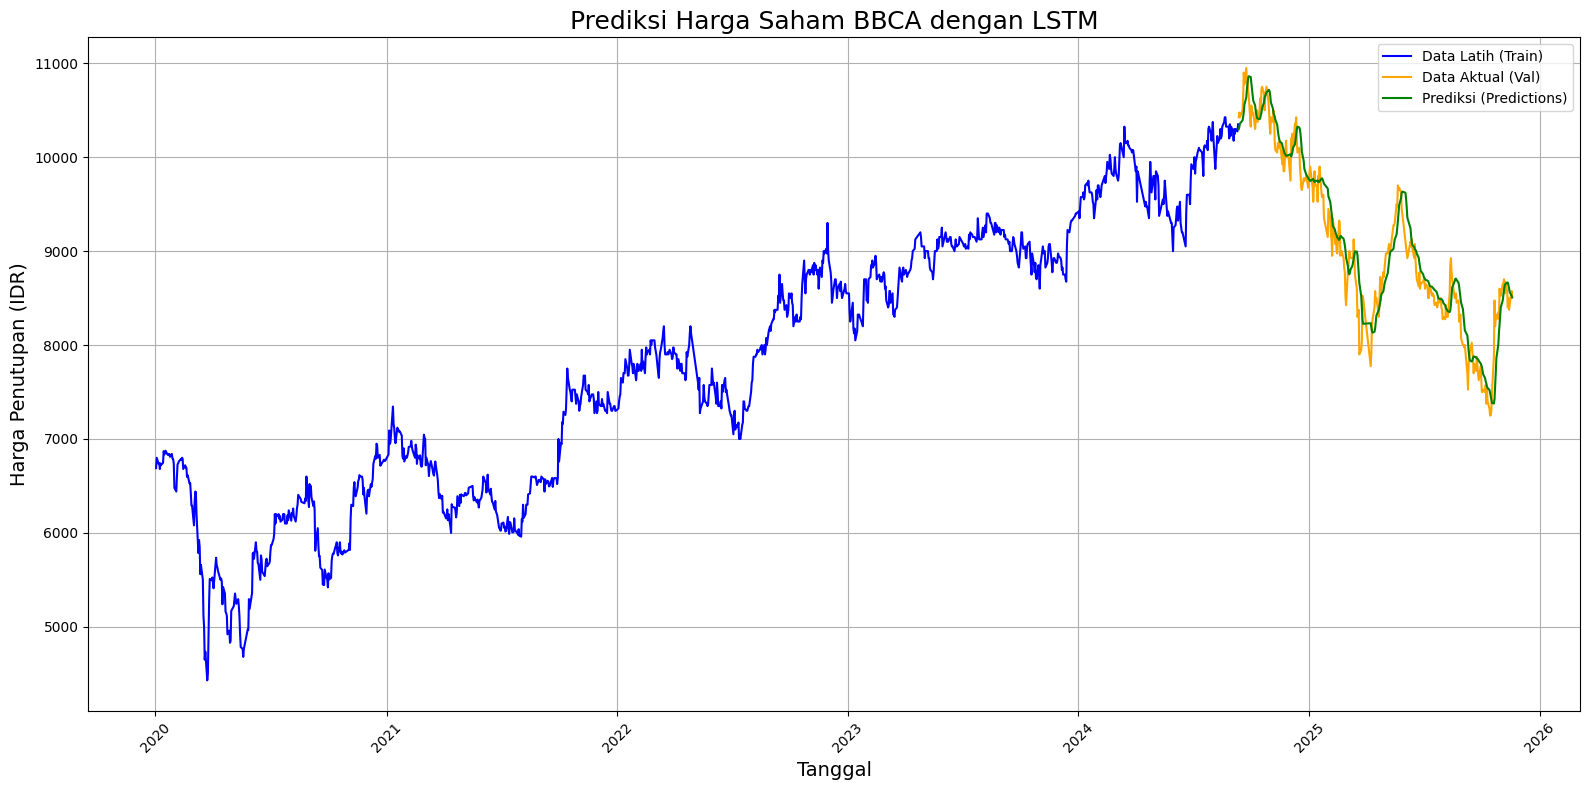


ANALISIS HASIL PREDIKSI SAHAM BBCA
Periode Data: 2020-01-02 s/d 2025-11-18
Total Data: 1419 hari
Data Training: 1136 hari (80.1%)
Data Testing: 283 hari (19.9%)

Periode Training: 2020-01-02 s/d 2024-09-10
Periode Testing/Prediksi: 2024-09-11 s/d 2025-11-18

Root Mean Squared Error (RMSE): Rp 241.25
Rata-rata error: ±Rp 241.25 per prediksi

Harga Aktual Terakhir: Rp 8,525 (tanggal 2025-11-18)
Harga Prediksi Terakhir: Rp 8,506 (tanggal 2025-11-18)
Selisih: Rp 19

------------------------------------------------------------
PENJELASAN:
------------------------------------------------------------
Model ini TIDAK memprediksi harga di masa depan (setelah 18 Nov 2025).
Model memprediksi harga pada periode TESTING (20% data terakhir).
Yaitu dari 11-09-2024 sampai 18-11-2025.

Prediksi dibandingkan dengan harga AKTUAL yang sudah diketahui
untuk mengukur akurasi model (RMSE).


In [3]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

# ==========================================
# 1. Persiapan Data (Data Loading & Cleaning)
# ==========================================

# Load dataset
# Pastikan nama file sesuai dengan file yang Anda upload
file_path = 'Bank Central Asia Stock Price History.csv'
df = pd.read_csv(file_path)

# Membersihkan kolom 'Price' (menghapus koma dan ubah ke float)
# Contoh: "8,525" menjadi 8525.0
df['Price'] = df['Price'].astype(str).str.replace(',', '').astype(float)

# Konversi kolom 'Date' menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# Urutkan data berdasarkan tanggal (dari lampau ke terbaru)
df = df.sort_values('Date')

# Filter data sesuai rentang waktu yang diminta (1 Jan 2020 - 18 Nov 2025)
start_date = '2020-01-01'
end_date = '2025-11-18'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df = df.loc[mask]

# Reset index setelah filtering
df = df.reset_index(drop=True)

# Kita hanya akan menggunakan kolom 'Price' untuk prediksi
data = df.filter(['Date', 'Price'])
dataset = data['Price'].values.reshape(-1, 1)

# ==========================================
# 2. Normalisasi Data (Scaling)
# ==========================================

# LSTM sangat sensitif terhadap skala data, jadi kita normalisasi ke range 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# ==========================================
# 3. Split Data (Train & Test)
# ==========================================

# Menggunakan 80% data untuk training
training_data_len = int(np.ceil(len(dataset) * 0.8))

# Buat data training yang sudah discale
train_data = scaled_data[0:training_data_len, :]

# Membagi data menjadi x_train dan y_train
x_train = []
y_train = []

# Menggunakan window size 60 (menggunakan 60 hari lalu untuk memprediksi hari ke-61)
window_size = 60

for i in range(window_size, len(train_data)):
    x_train.append(train_data[i-window_size:i, 0])
    y_train.append(train_data[i, 0])
    
# Ubah menjadi numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape data agar sesuai input LSTM [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# ==========================================
# 4. Membangun Model LSTM
# ==========================================

model = Sequential()
# Layer LSTM 1
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# Layer LSTM 2
model.add(LSTM(units=50, return_sequences=False))
# Dense Layer
model.add(Dense(units=25))
# Output Layer
model.add(Dense(units=1))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# ==========================================
# 5. Training Model
# ==========================================

print("Sedang melatih model...")
model.fit(x_train, y_train, batch_size=32, epochs=20) # Epochs bisa ditambah untuk hasil lebih baik

# ==========================================
# 6. Testing & Prediksi
# ==========================================

# Buat array baru berisi nilai scaled dari index (training_len - 60) sampai akhir
test_data = scaled_data[training_data_len - window_size: , :]

# Buat dataset x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(window_size, len(test_data)):
    x_test.append(test_data[i-window_size:i, 0])

# Ubah ke numpy array dan reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Lakukan prediksi
predictions = model.predict(x_test)
# Kembalikan nilai prediksi ke skala asli (Rupiah)
predictions = scaler.inverse_transform(predictions)

# Hitung RMSE (Root Mean Squared Error) untuk evaluasi
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# ==========================================
# 7. Visualisasi Hasil (DENGAN TANGGAL SEBENARNYA)
# ==========================================

# Buat dataframe untuk train dan valid dengan tanggal
train = data[:training_data_len].copy()
valid = data[training_data_len:].copy()
valid['Predictions'] = predictions

# Plotting dengan menggunakan Date sebagai sumbu X
plt.figure(figsize=(16,8))
plt.title('Prediksi Harga Saham BBCA dengan LSTM', fontsize=18)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Harga Penutupan (IDR)', fontsize=14)

# Plot data training
plt.plot(train['Date'], train['Price'], label='Data Latih (Train)', color='blue')

# Plot data aktual dan prediksi
plt.plot(valid['Date'], valid['Price'], label='Data Aktual (Val)', color='orange')
plt.plot(valid['Date'], valid['Predictions'], label='Prediksi (Predictions)', color='green')

plt.legend(loc='upper right')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ==========================================
# 8. Analisis Detail Hasil
# ==========================================

print("\n" + "="*60)
print("ANALISIS HASIL PREDIKSI SAHAM BBCA")
print("="*60)
print(f"Periode Data: {df['Date'].min().strftime('%Y-%m-%d')} s/d {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"Total Data: {len(df)} hari")
print(f"Data Training: {training_data_len} hari ({training_data_len/len(df)*100:.1f}%)")
print(f"Data Testing: {len(df)-training_data_len} hari ({(len(df)-training_data_len)/len(df)*100:.1f}%)")

# Tanggal periode testing
print(f"\nPeriode Training: {train['Date'].min().strftime('%Y-%m-%d')} s/d {train['Date'].max().strftime('%Y-%m-%d')}")
print(f"Periode Testing/Prediksi: {valid['Date'].min().strftime('%Y-%m-%d')} s/d {valid['Date'].max().strftime('%Y-%m-%d')}")

print(f"\nRoot Mean Squared Error (RMSE): Rp {rmse:.2f}")
print(f"Rata-rata error: ±Rp {rmse:.2f} per prediksi")

print(f"\nHarga Aktual Terakhir: Rp {valid['Price'].iloc[-1]:,.0f} (tanggal {valid['Date'].iloc[-1].strftime('%Y-%m-%d')})")
print(f"Harga Prediksi Terakhir: Rp {valid['Predictions'].iloc[-1]:,.0f} (tanggal {valid['Date'].iloc[-1].strftime('%Y-%m-%d')})")
print(f"Selisih: Rp {abs(valid['Price'].iloc[-1] - valid['Predictions'].iloc[-1]):,.0f}")

print("\n" + "-"*60)
print("PENJELASAN:")
print("-"*60)
print("Model ini TIDAK memprediksi harga di masa depan (setelah 18 Nov 2025).")
print("Model memprediksi harga pada periode TESTING (20% data terakhir).")
print(f"Yaitu dari {valid['Date'].min().strftime('%d-%m-%Y')} sampai {valid['Date'].max().strftime('%d-%m-%Y')}.")
print("\nPrediksi dibandingkan dengan harga AKTUAL yang sudah diketahui")
print("untuk mengukur akurasi model (RMSE).")
print("="*60)


# 2. Prediksi Harga Masa Depan (Future Prediction)

Cell ini melakukan:
- **Ambil Data Terbaru**: Menggunakan 60 hari terakhir dari seluruh dataset
- **Prediksi 1 Hari ke Depan**: Model memprediksi harga untuk 19 November 2025
- **Output**: Menampilkan harga terakhir yang diketahui dan hasil prediksi untuk hari berikutnya
- **Use Case**: Ini adalah prediksi REAL untuk masa depan (bukan evaluasi)

In [ ]:
# ==========================================
# 2. Prediksi 1 Hari ke Depan (19 November 2025)
# ==========================================

# Ambil 60 hari terakhir dari seluruh data
last_60_days = scaled_data[-window_size:]

# Reshape menjadi format yang sesuai untuk LSTM [1, 60, 1]
X_future = np.array([last_60_days])
X_future = np.reshape(X_future, (X_future.shape[0], X_future.shape[1], 1))

# Prediksi harga untuk 1 hari ke depan
future_price_scaled = model.predict(X_future)
future_price = scaler.inverse_transform(future_price_scaled)

# Tanggal prediksi (1 hari setelah data terakhir)
last_date = df['Date'].max()
next_date = last_date + pd.Timedelta(days=1)

print("\n" + "="*60)
print("PREDIKSI HARGA SAHAM BBCA - 1 HARI KE DEPAN")
print("="*60)
print(f"Data Terakhir: {last_date.strftime('%d-%m-%Y')} - Harga: Rp {df['Price'].iloc[-1]:,.0f}")
print(f"Prediksi untuk: {next_date.strftime('%d-%m-%Y')} - Harga: Rp {future_price[0][0]:,.0f}")
print("="*60)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

PREDIKSI HARGA SAHAM BBCA - 1 HARI KE DEPAN
Data Terakhir: 18-11-2025 - Harga: Rp 8,525
Prediksi untuk: 19-11-2025 - Harga: Rp 8,497


# 3. Rolling Prediction Test - Uji Akurasi Model

Cell ini melakukan:
- **Simulasi Prediksi Real-Time**: Test prediksi 1 hari ke depan untuk 30 hari terakhir
- **Metodologi**: Gunakan data sampai hari X → prediksi hari X+1 → bandingkan dengan aktual
- **Metrik Evaluasi**: Hitung RMSE, MAE, dan MAPE untuk mengukur akurasi
- **Output Detail**: Tampilkan 5 prediksi terakhir dengan error per tanggal
- **Tujuan**: Menguji kemampuan model dalam kondisi prediksi sebenarnya

In [ ]:
# ==========================================
# 3. Rolling Prediction Test
# ==========================================
# Kita akan test prediksi 1 hari ke depan untuk 30 hari terakhir

num_test_days = 30  # Jumlah hari yang akan ditest

rolling_predictions = []
rolling_actual = []
rolling_dates = []

print("\n" + "="*80)
print("ROLLING PREDICTION TEST - Prediksi 1 Hari ke Depan")
print("="*80)
print(f"Menguji {num_test_days} hari terakhir dari dataset...")
print("-"*80)

for i in range(num_test_days, 0, -1):
    # Ambil data sampai hari ke-(length-i)
    data_until_day = scaled_data[:-i]
    
    # Pastikan kita punya minimal 60 hari data
    if len(data_until_day) < window_size:
        continue
    
    # Ambil 60 hari terakhir dari data_until_day
    last_60 = data_until_day[-window_size:]
    
    # Reshape untuk prediksi
    X_pred = np.array([last_60])
    X_pred = np.reshape(X_pred, (X_pred.shape[0], X_pred.shape[1], 1))
    
    # Prediksi hari berikutnya
    pred_scaled = model.predict(X_pred, verbose=0)
    pred_price = scaler.inverse_transform(pred_scaled)[0][0]
    
    # Harga aktual hari berikutnya
    actual_price = dataset[len(data_until_day)][0]
    
    # Tanggal prediksi
    pred_date = df['Date'].iloc[len(data_until_day)]
    
    rolling_predictions.append(pred_price)
    rolling_actual.append(actual_price)
    rolling_dates.append(pred_date)

# Konversi ke numpy array
rolling_predictions = np.array(rolling_predictions)
rolling_actual = np.array(rolling_actual)

# Hitung metrik evaluasi
rolling_rmse = np.sqrt(np.mean((rolling_predictions - rolling_actual) ** 2))
rolling_mae = np.mean(np.abs(rolling_predictions - rolling_actual))
rolling_mape = np.mean(np.abs((rolling_actual - rolling_predictions) / rolling_actual)) * 100

print(f"Selesai! Total prediksi: {len(rolling_predictions)} hari")
print("\n" + "="*80)
print("HASIL EVALUASI ROLLING PREDICTION")
print("="*80)
print(f"Root Mean Squared Error (RMSE): Rp {rolling_rmse:.2f}")
print(f"Mean Absolute Error (MAE): Rp {rolling_mae:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {rolling_mape:.2f}%")
print("="*80)

# Tampilkan beberapa prediksi terakhir
print("\n5 PREDIKSI TERAKHIR:")
print("-"*80)
print(f"{'Tanggal':<15} {'Harga Aktual':>15} {'Prediksi':>15} {'Error':>15} {'Error %':>10}")
print("-"*80)
for i in range(max(-5, -len(rolling_dates)), 0):
    date_str = rolling_dates[i].strftime('%Y-%m-%d')
    actual = rolling_actual[i]
    pred = rolling_predictions[i]
    error = pred - actual
    error_pct = (error / actual) * 100
    print(f"{date_str:<15} Rp {actual:>12,.0f} Rp {pred:>12,.0f} Rp {error:>12,.0f} {error_pct:>9.2f}%")
print("="*80)


ROLLING PREDICTION TEST - Prediksi 1 Hari ke Depan
Menguji 30 hari terakhir dari dataset...
--------------------------------------------------------------------------------
Selesai! Total prediksi: 30 hari

HASIL EVALUASI ROLLING PREDICTION
Root Mean Squared Error (RMSE): Rp 323.11
Mean Absolute Error (MAE): Rp 237.18
Mean Absolute Percentage Error (MAPE): 2.90%

5 PREDIKSI TERAKHIR:
--------------------------------------------------------------------------------
Tanggal            Harga Aktual        Prediksi           Error    Error %
--------------------------------------------------------------------------------
2025-11-12      Rp        8,500 Rp        8,639 Rp          139      1.63%
2025-11-13      Rp        8,375 Rp        8,608 Rp          233      2.78%
2025-11-14      Rp        8,425 Rp        8,565 Rp          140      1.66%
2025-11-17      Rp        8,575 Rp        8,525 Rp          -50     -0.59%
2025-11-18      Rp        8,525 Rp        8,506 Rp          -19     -0.22%


# 4. Visualisasi Rolling Prediction

Cell ini melakukan:
- **Grafik Perbandingan**: Plot harga aktual vs prediksi 1 hari ke depan
- **Analisis Error**: Visualisasi error prediksi dari waktu ke waktu
- **Distribusi Error**: Histogram untuk melihat pola kesalahan prediksi
- **Insight**: Membantu memahami performa dan pola error model secara visual

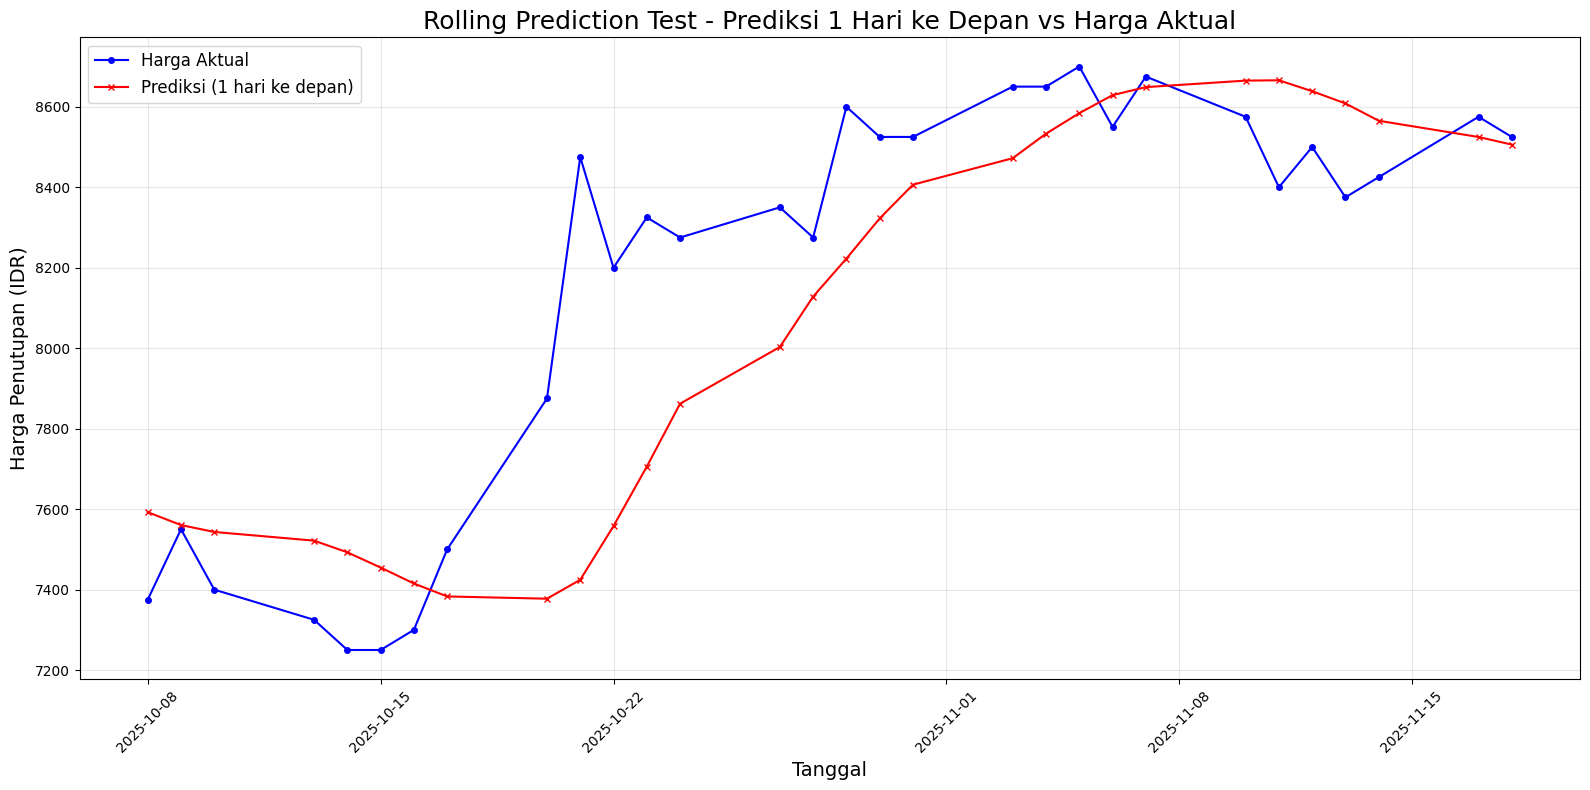

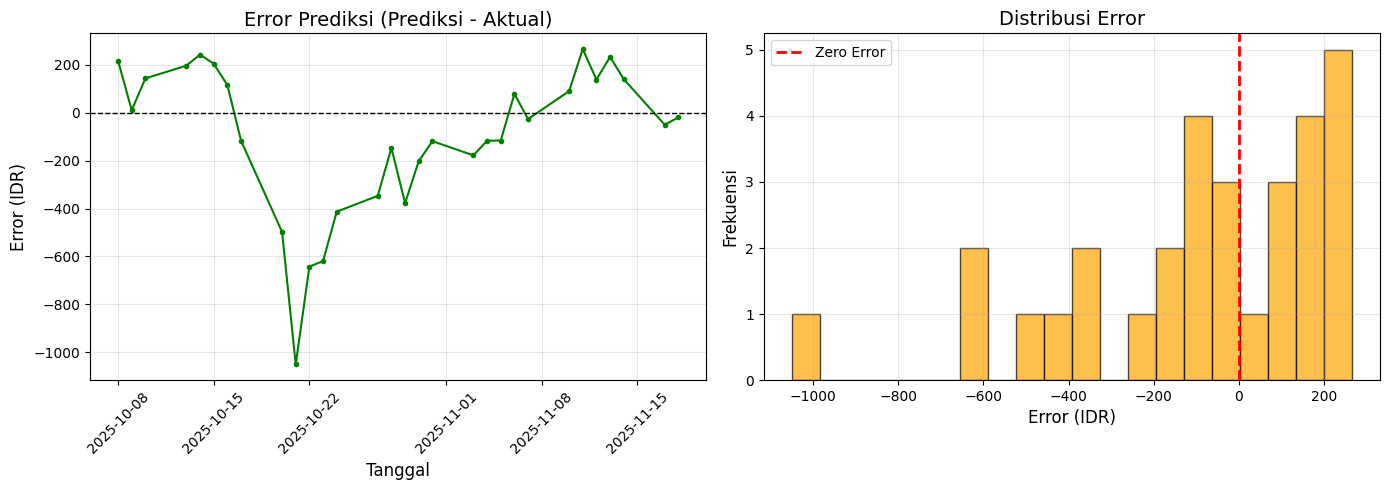

In [ ]:
# ==========================================
# 4. Visualisasi Rolling Prediction
# ==========================================

plt.figure(figsize=(16, 8))
plt.title('Rolling Prediction Test - Prediksi 1 Hari ke Depan vs Harga Aktual', fontsize=18)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Harga Penutupan (IDR)', fontsize=14)

# Plot harga aktual
plt.plot(rolling_dates, rolling_actual, label='Harga Aktual', color='blue', marker='o', markersize=4)

# Plot prediksi
plt.plot(rolling_dates, rolling_predictions, label='Prediksi (1 hari ke depan)', color='red', marker='x', markersize=4)

plt.legend(loc='best', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot error distribution
plt.figure(figsize=(14, 5))

# Subplot 1: Error over time
plt.subplot(1, 2, 1)
errors = rolling_predictions - rolling_actual
plt.plot(rolling_dates, errors, color='green', marker='o', markersize=3)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title('Error Prediksi (Prediksi - Aktual)', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Error (IDR)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# Subplot 2: Error distribution histogram
plt.subplot(1, 2, 2)
plt.hist(errors, bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.axvline(x=0, color='red', linestyle='--', linewidth=2, label='Zero Error')
plt.title('Distribusi Error', fontsize=14)
plt.xlabel('Error (IDR)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Kesimpulan & Interpretasi

**Penjelasan Rolling Prediction:**
- Model menggunakan data sampai tanggal X untuk memprediksi tanggal X+1
- Mirip dengan kondisi real: kita hanya tahu data masa lalu, prediksi masa depan
- Menguji kemampuan model untuk prediksi 1 hari ke depan secara konsisten

**Metrik Evaluasi:**
- **RMSE (Root Mean Squared Error)**: Error rata-rata dalam Rupiah, memberikan penalti lebih besar untuk error besar
- **MAE (Mean Absolute Error)**: Rata-rata absolut selisih prediksi vs aktual, lebih mudah diinterpretasi
- **MAPE (Mean Absolute Percentage Error)**: Error dalam persentase, berguna untuk membandingkan antar model

**Cara Menggunakan Model untuk Prediksi Real:**
1. Jalankan Cell 2 untuk prediksi tanggal 19 November 2025
2. Update data CSV dengan harga terbaru untuk prediksi hari berikutnya
3. Model perlu di-retrain secara berkala dengan data terbaru untuk akurasi optimal
4. Perhatikan bahwa prediksi jangka pendek (1 hari) lebih akurat daripada jangka panjang

**Catatan Penting:**
- Model ini untuk edukasi dan penelitian, bukan rekomendasi investasi
- Harga saham dipengaruhi banyak faktor eksternal yang tidak tertangkap model
- Selalu lakukan analisis fundamental dan teknikal tambahan sebelum berinvestasi